# Preliminary binary classification of lowcov and highcov aDNA samples ($𝑛=10+15$) into FP, Alu, L1, SVA

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

## Summary of data

### Summary of TP/FP counts
| Types      | Counts |
| ----------- | ----------- |
| Total      | 22540       |
| TP (Alu/L1/SVA)   |  10041     |
| TP (Alu)       |  2410    |
| TP (L1)       | 6969   |
| TP (SVA)       | 662  |
| FP        | 12500    |

### Summary of number of features
| Types      | Counts |
| ------------ | ------ |
| Raw       | 30    |
| After preprocessing | 25   |

In [2]:
df = pd.read_csv("./data/all.impute.out", sep="\t")
df.rename(columns={"15": "TE_start"}, inplace=True)
df.head(10)

,#chr,pos,TE_chr,TE_start,TE_end,TE_family,TE_length,nearby_sites,lclip,rclip,...,dr_L1,dr_SVA,longest_clip_len,l_cov,r_cov,polyA,cns_std_l_polyA,cns_std_r_polyA,ratio_low_MAPQ,clip_pos_std
0,chr1,185707445,chr1,185707430,185707461,SINE/Alu:AluYg6,600,0,8,8,...,0,0,29,8.74,12.28,4,0,2,0.000000,0.00
1,chr1,49644869,.,-1,-1,.,-1,1,2,0,...,0,0,42,53.20,65.00,0,1,0,0.000000,13.94
2,chr1,224583725,chr1,224583710,224583741,SINE/Alu:AluYe5,298,0,0,6,...,0,0,18,10.12,4.56,0,0,0,0.000000,0.00
3,chr1,199204290,.,-1,-1,.,-1,2,0,2,...,0,0,0,83.44,27.16,0,0,0,0.000000,17.19
4,chr1,90999988,chr1,90999973,91000004,LINE/L1:L1PA3,17191,0,0,28,...,0,0,32,34.80,7.92,4,0,0,0.135417,7.27
5,chr1,33061051,.,-1,-1,.,-1,3,2,0,...,0,0,37,80.92,75.96,0,0,1,0.000000,15.24
6,chr1,17996840,.,-1,-1,.,-1,6,2,2,...,0,0,27,60.04,62.84,0,0,0,0.000000,12.48
7,chr1,243498092,.,-1,-1,.,-1,1,0,2,...,0,0,0,4.16,6.24,0,0,0,0.000000,17.06
8,chr1,247191305,chr1,247191290,247191321,LINE/L1:L1PA3,3849,0,3,0,...,0,0,25,0.06,2.26,0,0,0,0.000000,0.00
9,chr1,184399773,.,-1,-1,.,-1,1,2,0,...,0,0,35,46.04,55.76,0,1,0,0.246988,9.90


## Relabel Alu, L1, SVA classes into numbers (then one-hot encoding)

In [3]:
df = df.replace({'TE_family': '.'}, {'TE_family': "FP"}, regex=False)
df = df.replace(regex=r'^SINE/Alu.*$', value='Alu')
df = df.replace(regex=r'^LINE/L1.*$', value='L1')
df = df.replace(regex=r'^Retroposon/SVA.*$', value='SVA')
df.head(10)

,#chr,pos,TE_chr,TE_start,TE_end,TE_family,TE_length,nearby_sites,lclip,rclip,...,dr_L1,dr_SVA,longest_clip_len,l_cov,r_cov,polyA,cns_std_l_polyA,cns_std_r_polyA,ratio_low_MAPQ,clip_pos_std
0,chr1,185707445,chr1,185707430,185707461,Alu,600,0,8,8,...,0,0,29,8.74,12.28,4,0,2,0.000000,0.00
1,chr1,49644869,.,-1,-1,FP,-1,1,2,0,...,0,0,42,53.20,65.00,0,1,0,0.000000,13.94
2,chr1,224583725,chr1,224583710,224583741,Alu,298,0,0,6,...,0,0,18,10.12,4.56,0,0,0,0.000000,0.00
3,chr1,199204290,.,-1,-1,FP,-1,2,0,2,...,0,0,0,83.44,27.16,0,0,0,0.000000,17.19
4,chr1,90999988,chr1,90999973,91000004,L1,17191,0,0,28,...,0,0,32,34.80,7.92,4,0,0,0.135417,7.27
5,chr1,33061051,.,-1,-1,FP,-1,3,2,0,...,0,0,37,80.92,75.96,0,0,1,0.000000,15.24
6,chr1,17996840,.,-1,-1,FP,-1,6,2,2,...,0,0,27,60.04,62.84,0,0,0,0.000000,12.48
7,chr1,243498092,.,-1,-1,FP,-1,1,0,2,...,0,0,0,4.16,6.24,0,0,0,0.000000,17.06
8,chr1,247191305,chr1,247191290,247191321,L1,3849,0,3,0,...,0,0,25,0.06,2.26,0,0,0,0.000000,0.00
9,chr1,184399773,.,-1,-1,FP,-1,1,2,0,...,0,0,35,46.04,55.76,0,1,0,0.246988,9.90


## Drop info useless to classification (TE coordinate, TE insertion info)

In [4]:
df = df.drop(["#chr", "pos", "TE_chr", "TE_start", "TE_end", "TE_length"], axis=1)
df.head()

,TE_family,nearby_sites,lclip,rclip,cr_Alu,cr_L1,cr_SVA,cns_Alu,cns_L1,cns_SVA,...,dr_L1,dr_SVA,longest_clip_len,l_cov,r_cov,polyA,cns_std_l_polyA,cns_std_r_polyA,ratio_low_MAPQ,clip_pos_std
0,Alu,0,8,8,0,0,0,10,10,10,...,0,0,29,8.74,12.28,4,0,2,0.000000,0.00
1,FP,1,2,0,0,2,0,0,0,1,...,0,0,42,53.20,65.00,0,1,0,0.000000,13.94
2,Alu,0,0,6,0,0,0,6,6,6,...,0,0,18,10.12,4.56,0,0,0,0.000000,0.00
3,FP,2,0,2,0,0,0,0,1,0,...,0,0,0,83.44,27.16,0,0,0,0.000000,17.19
4,L1,0,0,28,0,28,0,20,21,16,...,0,0,32,34.80,7.92,4,0,0,0.135417,7.27


## Assess colinearity between features and normalize

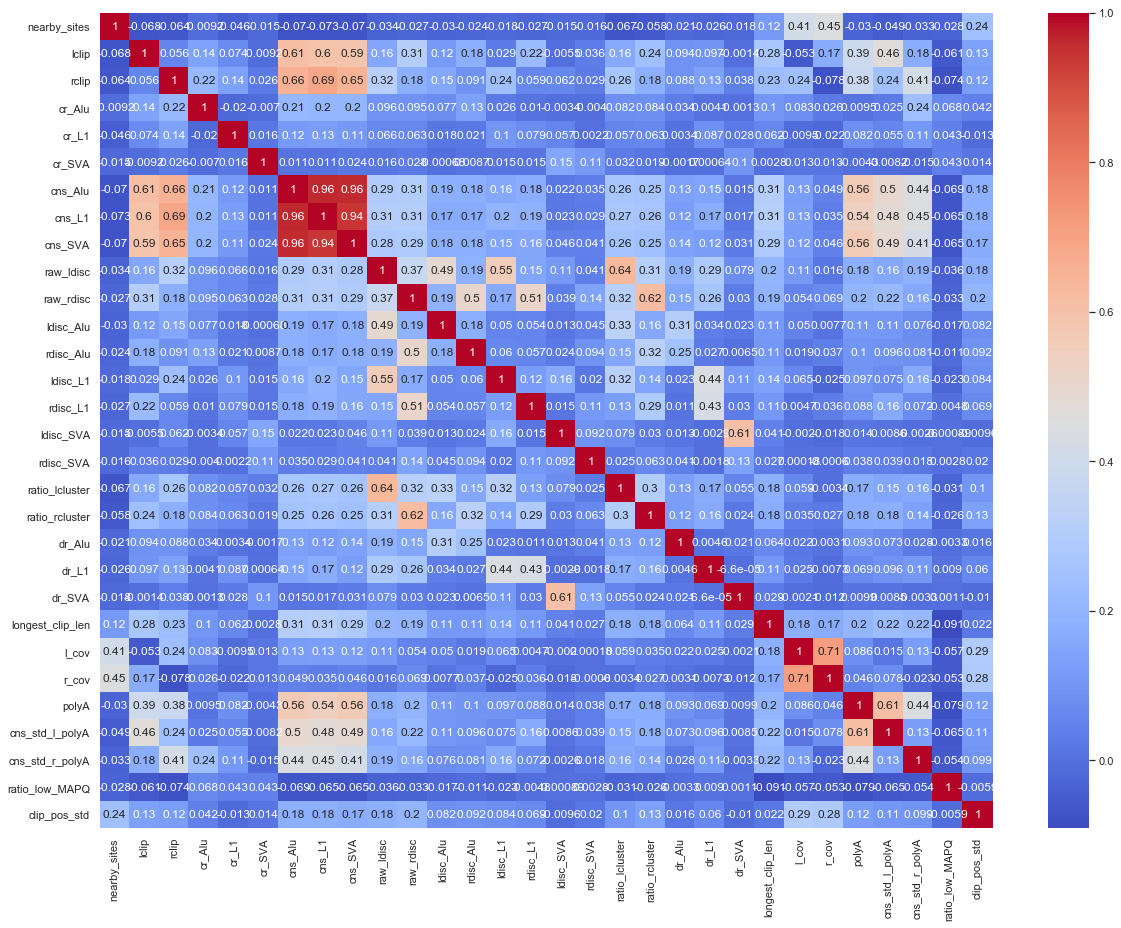

In [39]:
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(df.corr(), annot=True, fmt='.2g', cmap='coolwarm')

Preprocess the features as in `aDNA_binary_classification`.

In [5]:
features_norm = df.drop(['lclip', 'rclip', 'cr_Alu', 'cns_Alu', 'cr_L1', 'cns_L1', 'cr_SVA', 'cns_SVA', 
                         'raw_ldisc', 'raw_rdisc', 
                         'ldisc_Alu', 'rdisc_Alu', 'dr_Alu', 'ldisc_L1', 'rdisc_L1', 'dr_L1','ldisc_SVA', 'rdisc_SVA', 'dr_SVA',
                         'l_cov', 'r_cov', 'polyA', 'cns_std_l_polyA', 'cns_std_r_polyA'], axis=1)
labels = df['TE_family']
features_norm['lclip'] = np.where(df['l_cov']>0, df['lclip']/df['l_cov'], 0)
features_norm['rclip'] = np.where(df['r_cov']>0, df['rclip']/df['r_cov'], 0)
features_norm['cr_Alu'] = np.where(df['lclip']+df['rclip']>0, df['cr_Alu']/(df['lclip']+df['rclip']), 0)
features_norm['cns_Alu'] = np.where(df['lclip']+df['rclip']>0, df['cns_Alu']/(df['lclip']+df['rclip']), 0)
features_norm['cr_L1'] = np.where(df['lclip']+df['rclip']>0, df['cr_L1']/(df['lclip']+df['rclip']), 0)
features_norm['cns_L1'] = np.where(df['lclip']+df['rclip']>0, df['cns_L1']/(df['lclip']+df['rclip']), 0)
features_norm['cr_SVA'] = np.where(df['lclip']+df['rclip']>0, df['cr_SVA']/(df['lclip']+df['rclip']), 0)
features_norm['cns_SVA'] = np.where(df['lclip']+df['rclip']>0, df['cns_SVA']/(df['lclip']+df['rclip']), 0)
features_norm['ldisc_Alu'] = np.where(df['r_cov']>0, df['ldisc_Alu']/df['r_cov'], 0)
features_norm['rdisc_Alu'] = np.where(df['l_cov']>0, df['rdisc_Alu']/df['l_cov'], 0)
features_norm['ldisc_L1'] = np.where(df['r_cov']>0, df['ldisc_L1']/df['r_cov'], 0)
features_norm['rdisc_L1'] = np.where(df['l_cov']>0, df['rdisc_L1']/df['l_cov'], 0)
features_norm['ldisc_SVA'] = np.where(df['r_cov']>0, df['ldisc_SVA']/df['r_cov'], 0)
features_norm['rdisc_SVA'] = np.where(df['l_cov']>0, df['rdisc_SVA']/df['l_cov'], 0)
features_norm['dr_Alu'] = np.where(df['raw_ldisc']+df['raw_rdisc']>0, df['dr_Alu']/(df['raw_ldisc']+df['raw_rdisc']), 0)
features_norm['dr_L1'] = np.where(df['raw_ldisc']+df['raw_rdisc']>0, df['dr_L1']/(df['raw_ldisc']+df['raw_rdisc']), 0)
features_norm['dr_SVA'] = np.where(df['raw_ldisc']+df['raw_rdisc']>0, df['dr_SVA']/(df['raw_ldisc']+df['raw_rdisc']), 0)
features_norm['cns_std_l_polyA'] = np.where(df['l_cov']>0, df['cns_std_l_polyA']/df['l_cov'], 0)
features_norm['cns_std_r_polyA'] = np.where(df['r_cov']>0, df['cns_std_r_polyA']/df['r_cov'], 0)
features_norm.head()

,TE_family,nearby_sites,ratio_lcluster,ratio_rcluster,longest_clip_len,ratio_low_MAPQ,clip_pos_std,lclip,rclip,cr_Alu,...,rdisc_Alu,ldisc_L1,rdisc_L1,ldisc_SVA,rdisc_SVA,dr_Alu,dr_L1,dr_SVA,cns_std_l_polyA,cns_std_r_polyA
0,Alu,0,0.0,0.0,29,0.000000,0.00,0.915332,0.651466,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.162866
1,FP,1,0.0,0.0,42,0.000000,13.94,0.037594,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018797,0.000000
2,Alu,0,0.0,0.0,18,0.000000,0.00,0.000000,1.315789,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,FP,2,0.0,0.0,0,0.000000,17.19,0.000000,0.073638,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,L1,0,0.0,1.0,32,0.135417,7.27,0.000000,3.535354,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


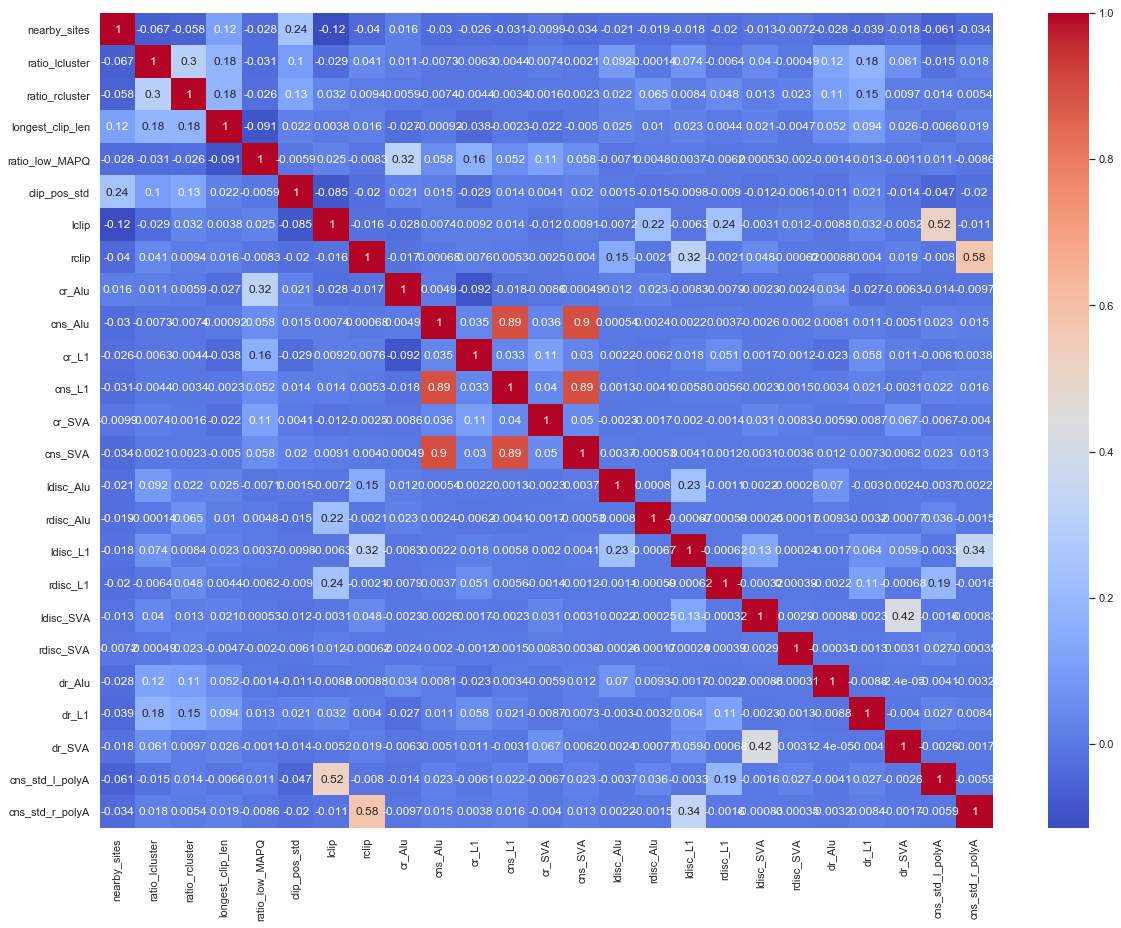

In [41]:
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(features_norm.corr(), annot=True, fmt='.2g', cmap='coolwarm')

### Write out cleaned data

In [6]:
features_norm.to_csv('./data/all_cleaned.tsv', index=False, sep='\t', header=True)

## Split data into train and test set

By the ratio of $80\%$, $20\%$.

In [7]:
features = features_norm.drop('TE_family', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=True)

In [8]:
X_train.to_csv('./data/all_train_features.csv', index=False)
X_test.to_csv('./data/all_test_features.csv', index=False)

y_train.to_csv('./data/all_train_labels.csv', index=False)
y_test.to_csv('./data/all_test_labels.csv', index=False)

## Model training and testing

### Logistic regression

In [2]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from time import time

In [10]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))
        
lr = LogisticRegression(max_iter=500)
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 5000, 10000]
}

cv = GridSearchCV(lr, parameters, cv=5, scoring='balanced_accuracy')
# is it valid if labels are not one-hot encoded????
cv.fit(X_train, y_train.values.ravel()) #.values.ravel() converts a pandas series into an array

print_results(cv)
cv.best_estimator_

c:\users\97841\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\97841\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

c:\users\97841\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\97841\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

c:\users\97841\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\97841\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

BEST PARAMS: {'C': 5000}

0.38 (+/-0.005) for {'C': 0.001}
0.407 (+/-0.003) for {'C': 0.01}
0.445 (+/-0.015) for {'C': 0.1}
0.454 (+/-0.013) for {'C': 1}
0.456 (+/-0.011) for {'C': 10}
0.457 (+/-0.016) for {'C': 100}
0.455 (+/-0.019) for {'C': 500}
0.457 (+/-0.018) for {'C': 1000}
0.459 (+/-0.011) for {'C': 5000}
0.456 (+/-0.015) for {'C': 10000}


c:\users\97841\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=5000, max_iter=500)

In [11]:
joblib.dump(cv.best_estimator_, './models/all_LR_model.pkl')

['./models/all_LR_model.pkl']

### Multilayer Perceptron

In [12]:
mlp = MLPClassifier(max_iter=500)
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

cv = GridSearchCV(mlp, parameters, cv=5, scoring='balanced_accuracy')
cv.fit(X_train, y_train.values.ravel())

print_results(cv)
cv.best_estimator_

c:\users\97841\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\97841\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\97841\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\97841\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stoch

BEST PARAMS: {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}

0.658 (+/-0.024) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.653 (+/-0.049) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.634 (+/-0.045) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.704 (+/-0.037) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.698 (+/-0.034) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.696 (+/-0.012) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.708 (+/-0.037) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.723 (+/-0.04) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.705 (+/-0.015) for {'activation': 'relu', 'hidden_layer_sizes': (100,), '

MLPClassifier(activation='logistic', learning_rate='invscaling', max_iter=500)

In [13]:
joblib.dump(cv.best_estimator_, './models/all_MLP_model.pkl')

['./models/all_MLP_model.pkl']

### Random Forest

In [14]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5, scoring='balanced_accuracy')
cv.fit(X_train, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 32, 'n_estimators': 250}

0.431 (+/-0.031) for {'max_depth': 2, 'n_estimators': 5}
0.44 (+/-0.011) for {'max_depth': 2, 'n_estimators': 50}
0.441 (+/-0.005) for {'max_depth': 2, 'n_estimators': 250}
0.468 (+/-0.012) for {'max_depth': 4, 'n_estimators': 5}
0.472 (+/-0.002) for {'max_depth': 4, 'n_estimators': 50}
0.471 (+/-0.003) for {'max_depth': 4, 'n_estimators': 250}
0.564 (+/-0.024) for {'max_depth': 8, 'n_estimators': 5}
0.549 (+/-0.045) for {'max_depth': 8, 'n_estimators': 50}
0.553 (+/-0.03) for {'max_depth': 8, 'n_estimators': 250}
0.665 (+/-0.044) for {'max_depth': 16, 'n_estimators': 5}
0.698 (+/-0.024) for {'max_depth': 16, 'n_estimators': 50}
0.702 (+/-0.031) for {'max_depth': 16, 'n_estimators': 250}
0.675 (+/-0.018) for {'max_depth': 32, 'n_estimators': 5}
0.713 (+/-0.032) for {'max_depth': 32, 'n_estimators': 50}
0.721 (+/-0.03) for {'max_depth': 32, 'n_estimators': 250}
0.681 (+/-0.031) for {'max_depth': None, 'n_estimators': 5}
0.714 (+/-0.02

In [15]:
joblib.dump(cv.best_estimator_, './models/all_RF_model.pkl')

['./models/all_RF_model.pkl']

### Boosted Tree

In [16]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5, scoring='balanced_accuracy')
cv.fit(X_train, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 250}

0.25 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.425 (+/-0.004) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.468 (+/-0.012) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.52 (+/-0.016) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.25 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.478 (+/-0.004) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.624 (+/-0.037) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.693 (+/-0.028) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.25 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.538 (+/-0.006) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.704 (+/-0.03) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.74 (+/-0.034) for {'learning_rate': 0.01, 

In [17]:
joblib.dump(cv.best_estimator_, './models/all_GB_model.pkl')

['./models/all_GB_model.pkl']

## Evaluate trained models on validation data and test data

Evaluate all saved models on validation data and select the best model and evaluate the test balanced accuracy.

In [18]:
models = {}

for mdl in ['LR', 'MLP', 'RF', 'GB']:
    models[mdl] = joblib.load('./models/all_{}_model.pkl'.format(mdl))
models

{'LR': LogisticRegression(C=5000, max_iter=500),
 'MLP': MLPClassifier(activation='logistic', learning_rate='invscaling', max_iter=500),
 'RF': RandomForestClassifier(max_depth=32, n_estimators=250),
 'GB': GradientBoostingClassifier(max_depth=5, n_estimators=250)}

In [19]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    bal_accuracy = round(balanced_accuracy_score(labels, pred), 3)
#     precision = round(precision_score(labels, pred), 3)
#     recall = round(recall_score(labels, pred), 3)
    mat = confusion_matrix(labels, pred)
    print('{} -- Balanced Accuracy: {} / \
          Confusion Matrix: {} / \
          Latency: {}ms'.format(name,bal_accuracy,mat,round((end - start)*1000, 1)))

# for name, mdl in models.items():
#     evaluate_model(name, mdl, X_val, y_val)

### Evaluate models on test set

In [20]:
for name, mdl in models.items():
    evaluate_model(name, mdl, X_test, y_test)

LR -- Balanced Accuracy: 0.462 /           Confusion Matrix: [[  43  141  271    7]
 [  32 2344  140   13]
 [   9  400  960    1]
 [   8   62   58   19]] /           Latency: 38.0ms
MLP -- Balanced Accuracy: 0.757 /           Confusion Matrix: [[ 308   15  134    5]
 [  12 2480   33    4]
 [ 116   64 1184    6]
 [  23    9   39   76]] /           Latency: 29.9ms
RF -- Balanced Accuracy: 0.712 /           Confusion Matrix: [[ 263   13  185    1]
 [   5 2492   31    1]
 [  67   50 1252    1]
 [  16   11   64   56]] /           Latency: 601.2ms
GB -- Balanced Accuracy: 0.76 /           Confusion Matrix: [[ 290   10  159    3]
 [   8 2486   29    6]
 [  71   41 1252    6]
 [  17    8   46   76]] /           Latency: 201.4ms


In [21]:
for name, mdl in models.items():
    pred = mdl.predict(X_test)
    print(name)
    print(classification_report(y_test, pred))

LR
              precision    recall  f1-score   support

         Alu       0.47      0.09      0.16       462
          FP       0.80      0.93      0.86      2529
          L1       0.67      0.70      0.69      1370
         SVA       0.47      0.13      0.20       147

    accuracy                           0.75      4508
   macro avg       0.60      0.46      0.48      4508
weighted avg       0.71      0.75      0.71      4508

MLP
              precision    recall  f1-score   support

         Alu       0.67      0.67      0.67       462
          FP       0.97      0.98      0.97      2529
          L1       0.85      0.86      0.86      1370
         SVA       0.84      0.52      0.64       147

    accuracy                           0.90      4508
   macro avg       0.83      0.76      0.78      4508
weighted avg       0.90      0.90      0.90      4508

RF
              precision    recall  f1-score   support

         Alu       0.75      0.57      0.65       462
          F

## Training results (on held out data, chr1 + unmapped) - GB latency 201.4 ms

| TE family  |  Balanced Accuracy (ovr, corrected)  |  Precision (chr1 only) |  Recall (uncorrected) | Recall (ovr, corrected) |
| ----------- | ------------------------ | ---------------------- | --------------------- | ------------------ |
| Alu      |     0.707           |     0.751        |     0.628        |    0.518       |
| L1       |    0.809           |     0.843        |     0.914         |   0.738        |
| SVA      |    0.689            |     0.835         |     0.517        |    0.475       |

## Test on chr2 data

In [3]:
def clean_test_data(input_file, header=True):
    test_df = pd.read_csv(input_file, sep="\t")
    if not header:
        test_df.columns = ["#chr", "pos", "TE_chr", "TE_start", "TE_end", "TE_family", "TE_length",
                           "nearby_sites",
                           "lclip", "rclip",
                           "cr_Alu", "cr_L1", "cr_SVA",
                           "cns_Alu", "cns_L1", "cns_SVA",
                           "raw_ldisc", "raw_rdisc", 
                           "ldisc_Alu", "rdisc_Alu", "ldisc_L1", "rdisc_L1", "ldisc_SVA", "rdisc_SVA",
                           "ratio_lcluster", "ratio_rcluster",
                           "dr_Alu", "dr_L1", "dr_SVA",
                           "longest_clip_len", "l_cov", "r_cov", "polyA", "cns_std_l_polyA", "cns_std_r_polyA", "ratio_low_MAPQ", "clip_pos_std"]
    else:
        test_df.rename(columns={"15": "TE_start"}, inplace=True)
    test_df = test_df.replace({'TE_family': '.'}, {'TE_family': "FP"}, regex=False)
    test_df = test_df.replace(regex=r'^SINE/Alu.*$', value='Alu')
    test_df = test_df.replace(regex=r'^LINE/L1.*$', value='L1')
    test_df = test_df.replace(regex=r'^Retroposon/SVA.*$', value='SVA')
    test_df = test_df.drop(["#chr", "pos", "TE_chr", "TE_start", "TE_end", "TE_length"], axis=1)
    test_features_norm = test_df.drop(['lclip', 'rclip', 'cr_Alu', 'cns_Alu', 'cr_L1', 'cns_L1', 'cr_SVA', 'cns_SVA', 
                             'raw_ldisc', 'raw_rdisc', 
                             'ldisc_Alu', 'rdisc_Alu', 'dr_Alu', 'ldisc_L1', 'rdisc_L1', 'dr_L1','ldisc_SVA', 'rdisc_SVA', 'dr_SVA',
                             'l_cov', 'r_cov', 'polyA', 'cns_std_l_polyA', 'cns_std_r_polyA'], axis=1)
    test_labels = test_df['TE_family']
    test_features_norm['lclip'] = np.where(test_df['l_cov']>0, test_df['lclip']/test_df['l_cov'], 0)
    test_features_norm['rclip'] = np.where(test_df['r_cov']>0, test_df['rclip']/test_df['r_cov'], 0)
    test_features_norm['cr_Alu'] = np.where(test_df['lclip']+test_df['rclip']>0, test_df['cr_Alu']/(test_df['lclip']+test_df['rclip']), 0)
    test_features_norm['cns_Alu'] = np.where(test_df['lclip']+test_df['rclip']>0, test_df['cns_Alu']/(test_df['lclip']+test_df['rclip']), 0)
    test_features_norm['cr_L1'] = np.where(test_df['lclip']+test_df['rclip']>0, test_df['cr_L1']/(test_df['lclip']+test_df['rclip']), 0)
    test_features_norm['cns_L1'] = np.where(test_df['lclip']+test_df['rclip']>0, test_df['cns_L1']/(test_df['lclip']+test_df['rclip']), 0)
    test_features_norm['cr_SVA'] = np.where(test_df['lclip']+test_df['rclip']>0, test_df['cr_SVA']/(test_df['lclip']+test_df['rclip']), 0)
    test_features_norm['cns_SVA'] = np.where(test_df['lclip']+test_df['rclip']>0, test_df['cns_SVA']/(test_df['lclip']+test_df['rclip']), 0)
    test_features_norm['ldisc_Alu'] = np.where(test_df['r_cov']>0, test_df['ldisc_Alu']/test_df['r_cov'], 0)
    test_features_norm['rdisc_Alu'] = np.where(test_df['l_cov']>0, test_df['rdisc_Alu']/test_df['l_cov'], 0)
    test_features_norm['ldisc_L1'] = np.where(test_df['r_cov']>0, test_df['ldisc_L1']/test_df['r_cov'], 0)
    test_features_norm['rdisc_L1'] = np.where(test_df['l_cov']>0, test_df['rdisc_L1']/test_df['l_cov'], 0)
    test_features_norm['ldisc_SVA'] = np.where(test_df['r_cov']>0, test_df['ldisc_SVA']/test_df['r_cov'], 0)
    test_features_norm['rdisc_SVA'] = np.where(test_df['l_cov']>0, test_df['rdisc_SVA']/test_df['l_cov'], 0)
    test_features_norm['dr_Alu'] = np.where(test_df['raw_ldisc']+test_df['raw_rdisc']>0, test_df['dr_Alu']/(test_df['raw_ldisc']+test_df['raw_rdisc']), 0)
    test_features_norm['dr_L1'] = np.where(test_df['raw_ldisc']+test_df['raw_rdisc']>0, test_df['dr_L1']/(test_df['raw_ldisc']+test_df['raw_rdisc']), 0)
    test_features_norm['dr_SVA'] = np.where(test_df['raw_ldisc']+test_df['raw_rdisc']>0, test_df['dr_SVA']/(test_df['raw_ldisc']+test_df['raw_rdisc']), 0)
    test_features_norm['cns_std_l_polyA'] = np.where(test_df['l_cov']>0, test_df['cns_std_l_polyA']/test_df['l_cov'], 0)
    test_features_norm['cns_std_r_polyA'] = np.where(test_df['r_cov']>0, test_df['cns_std_r_polyA']/test_df['r_cov'], 0)
    test_features = test_features_norm.drop('TE_family', axis=1)
    
    return test_features, test_labels

In [4]:
test_features, test_labels = clean_test_data("./data/all_chr2.impute.out")

In [24]:
for name, mdl in models.items():
    evaluate_model(name, mdl, test_features, test_labels)

LR -- Balanced Accuracy: 0.462 /           Confusion Matrix: [[  230   806  1667    25]
 [  215 11659   588    38]
 [   56  2460  6189    38]
 [   32   194   253    66]] /           Latency: 19.9ms
MLP -- Balanced Accuracy: 0.695 /           Confusion Matrix: [[ 1775    62   840    51]
 [  557 10737  1140    66]
 [  702   392  7561    88]
 [  138    23   162   222]] /           Latency: 75.0ms
RF -- Balanced Accuracy: 0.643 /           Confusion Matrix: [[ 1444    59  1193    32]
 [  196 10701  1589    14]
 [  451   320  7948    24]
 [   81    32   280   152]] /           Latency: 2119.8ms
GB -- Balanced Accuracy: 0.694 /           Confusion Matrix: [[ 1626    41  1018    43]
 [  222 10909  1321    48]
 [  484   252  7956    51]
 [   87    18   223   217]] /           Latency: 906.3ms


In [25]:
for name, mdl in models.items():
    pred = mdl.predict(test_features)
    print(name)
    print(classification_report(test_labels, pred))

LR
              precision    recall  f1-score   support

         Alu       0.43      0.08      0.14      2728
          FP       0.77      0.93      0.84     12500
          L1       0.71      0.71      0.71      8743
         SVA       0.40      0.12      0.19       545

    accuracy                           0.74     24516
   macro avg       0.58      0.46      0.47     24516
weighted avg       0.70      0.74      0.70     24516

MLP
              precision    recall  f1-score   support

         Alu       0.56      0.65      0.60      2728
          FP       0.96      0.86      0.91     12500
          L1       0.78      0.86      0.82      8743
         SVA       0.52      0.41      0.46       545

    accuracy                           0.83     24516
   macro avg       0.70      0.70      0.70     24516
weighted avg       0.84      0.83      0.83     24516

RF
              precision    recall  f1-score   support

         Alu       0.66      0.53      0.59      2728
          F

## Split by sample

In [26]:
sample_list = ["I7224", "I1581", "I4233", "I4562", "I5109", "I5698", "I2170", "I6730", "I7491", "I0231", "I1633", "I5233",
               "I2514", "I5742", "I2935", "I5725", "I4877", "I2862", "I1734", "I3133", "I4432", "I2861", "I5838", "I3957", "I3255"]
model = joblib.load('./models/all_GB_model.pkl')

for sample in sample_list:
    test_features, test_labels = clean_test_data(f"./data/final_test_data_by_sample/{sample}.out", False)
    print(sample)
    evaluate_model("GB", model, test_features, test_labels)
    print("---------------------------------------------------------------------------------------------")

I7224
GB -- Balanced Accuracy: 0.514 /           Confusion Matrix: [[ 19   3  42   0]
 [ 20 362 110   7]
 [ 21  10 199   0]
 [  3   1  11   3]] /           Latency: 32.5ms
---------------------------------------------------------------------------------------------
I1581
GB -- Balanced Accuracy: 0.504 /           Confusion Matrix: [[ 15   1  41   3]
 [ 33 365  98   3]
 [  7   9 126   3]
 [  2   0   8   2]] /           Latency: 44.9ms
---------------------------------------------------------------------------------------------
I4233
GB -- Balanced Accuracy: 0.592 /           Confusion Matrix: [[ 48   0  57   1]
 [ 13 383 101   2]
 [ 27  15 259   0]
 [  5   1   9   6]] /           Latency: 51.3ms
---------------------------------------------------------------------------------------------
I4562
GB -- Balanced Accuracy: 0.571 /           Confusion Matrix: [[ 34   5  43   0]
 [ 12 343 138   6]
 [ 20   7 197   1]
 [  1   1   7   4]] /           Latency: 35.1ms
------------------------------

In [27]:
for sample in sample_list:
    test_features, test_labels = clean_test_data(f"./data/final_test_data_by_sample/{sample}.out", False)
    print(sample)
    pred = model.predict(test_features)
    print(classification_report(test_labels, pred))
    print("---------------------------------------------------------------------------------------------")

I7224
              precision    recall  f1-score   support

         Alu       0.30      0.30      0.30        64
          FP       0.96      0.73      0.83       499
          L1       0.55      0.87      0.67       230
         SVA       0.30      0.17      0.21        18

    accuracy                           0.72       811
   macro avg       0.53      0.51      0.50       811
weighted avg       0.78      0.72      0.73       811

---------------------------------------------------------------------------------------------
I1581
              precision    recall  f1-score   support

         Alu       0.26      0.25      0.26        60
          FP       0.97      0.73      0.84       499
          L1       0.46      0.87      0.60       145
         SVA       0.18      0.17      0.17        12

    accuracy                           0.71       716
   macro avg       0.47      0.50      0.47       716
weighted avg       0.80      0.71      0.73       716

------------------------

I4877
              precision    recall  f1-score   support

         Alu       0.79      0.73      0.76       122
          FP       0.99      0.96      0.97       500
          L1       0.87      0.95      0.91       425
         SVA       0.75      0.36      0.49        25

    accuracy                           0.91      1072
   macro avg       0.85      0.75      0.78      1072
weighted avg       0.91      0.91      0.91      1072

---------------------------------------------------------------------------------------------
I2862
              precision    recall  f1-score   support

         Alu       0.73      0.65      0.69       119
          FP       0.98      0.98      0.98       499
          L1       0.86      0.91      0.89       385
         SVA       0.73      0.46      0.56        24

    accuracy                           0.90      1027
   macro avg       0.83      0.75      0.78      1027
weighted avg       0.90      0.90      0.90      1027

------------------------

## Result (corrected precision/recall)

Note: For a fair comparison with the binary classifiers, in the calculation of FP recall, correctly classified FPs are defined as all the FPs and other TE families classified as either FP or one of the other TE family, e.g. Alu vs rest, correctly classified FPs include L1 classified as L1/SVA/FP.

In [28]:
def evaluate_model_corrected(model, features, labels, sample, RT, mat, bal_acc_list, precision_list, recall_list, f1_score_list):
    if RT == "Alu":
        total_TE = 123
        TP = mat[0,0]
        FP = mat[1,0] + mat[2,0] + mat[3,0]
        FP_total = 961
        FP_recall = np.around((mat[1,1:]+mat[2,1:]+mat[3,1:]).sum()/FP_total, 3)

    elif RT == "L1":
        total_TE = 435
        TP = mat[2,2]
        FP = mat[0,2] + mat[1,2] + mat[3,2]
        FP_total = 649
        FP_recall = np.around((mat[0,:2]+mat[0,3]+mat[1,:2]+mat[1,3]+mat[3,:2]+mat[3,3]).sum()/FP_total, 3)

    else:
        total_TE = 26
        TP = mat[3,3]
        FP = mat[0,3] + mat[1,3] + mat[2,3]
        FP_total = 1058
        FP_recall = np.around((mat[0,:3]+mat[1,:3]+mat[2,:3]).sum()/FP_total, 3)

    precision = np.round(TP/(TP + FP), 3)
    recall = np.round(TP/total_TE, 3)
    bal_accuracy = np.round((recall + FP_recall)/2, 3)
    f1_score = np.round(2 * precision * recall/(precision+recall), 3)
    bal_acc_list.append(bal_accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score)

def postprocess_stats(sample_list, RT, bal_accuracy_list, precision_list, recall_list, f1_score_list):
    bal_accuracy = np.array(bal_accuracy_list)
    precision = np.array(precision_list)
    recall = np.array(recall_list)
    f1_score = np.array(f1_score_list)
    df = pd.DataFrame({'Corr Balanced Accu': bal_accuracy, 'Precision':precision, 
                       'Corr Recall': recall, 'Corr F1-score': f1_score}, 
                      index=sample_list)
    print(RT)
    print(df)
    
    return df

def calc_stats_main(sample_list, in_dir='./data/final_test_data_by_sample/', mdl='GB'):
    model = joblib.load(f'./models/all_{mdl}_model.pkl')
    
    Alu_bal_acc_list = []
    Alu_precision_list = []
    Alu_recall_list = []
    Alu_f1_score_list = []
    
    L1_bal_acc_list = []
    L1_precision_list = []
    L1_recall_list = []
    L1_f1_score_list = []
    
    SVA_bal_acc_list = []
    SVA_precision_list = []
    SVA_recall_list = []
    SVA_f1_score_list = []
    
    RT = ["Alu", "L1", "SVA"]
    
    for sample in sample_list:
        input_file = in_dir + sample + ".out"
        test_features, test_labels = clean_test_data(f"./data/final_test_data_by_sample/{sample}.out", False)
        pred = model.predict(test_features)
        mat = confusion_matrix(test_labels, pred)
        
        for rt in RT:
            if rt == "Alu":
                evaluate_model_corrected(model, test_features, test_labels, sample, rt, mat, 
                                         Alu_bal_acc_list, Alu_precision_list, Alu_recall_list, Alu_f1_score_list)
            elif rt == "L1":
                evaluate_model_corrected(model, test_features, test_labels, sample, rt, mat,
                                         L1_bal_acc_list, L1_precision_list, L1_recall_list, L1_f1_score_list)
            else:
                evaluate_model_corrected(model, test_features, test_labels, sample, rt, mat,
                                         SVA_bal_acc_list, SVA_precision_list, SVA_recall_list, SVA_f1_score_list)
    
    for rt in RT:
        if rt == "Alu":
            Alu_df = postprocess_stats(sample_list, rt, Alu_bal_acc_list, Alu_precision_list, Alu_recall_list, Alu_f1_score_list)
        elif rt == "L1":
            L1_df = postprocess_stats(sample_list, rt, L1_bal_acc_list, L1_precision_list, L1_recall_list, L1_f1_score_list)
        else:
            SVA_df = postprocess_stats(sample_list, rt, SVA_bal_acc_list, SVA_precision_list, SVA_recall_list, SVA_f1_score_list)
        
    return Alu_df, L1_df, SVA_df

In [29]:
lowcov_sample_list = ["I7224", "I1581", "I4233", "I4562", "I5109", "I5698", "I2170", "I6730", "I7491", "I0231"]
highcov_sample_list = ["I1633", "I5233", "I2514", "I5742", "I2935", "I5725", "I4877", "I2862", "I1734", "I3133", 
                       "I4432", "I2861", "I5838", "I3957", "I3255"]

lowcov_Alu_df, lowcov_L1_df, lowcov_SVA_df = calc_stats_main(lowcov_sample_list)
lowcov_Alu_df.to_csv("./stats/multi/Alu_lowcov.tsv", index=True, sep='\t', header=True)
lowcov_L1_df.to_csv("./stats/multi/L1_lowcov.tsv", index=True, sep='\t', header=True)
lowcov_SVA_df.to_csv("./stats/multi/SVA_lowcov.tsv", index=True, sep='\t', header=True)
print("===============================================================================")
highcov_Alu_df, highcov_L1_df, highcov_SVA_df = calc_stats_main(highcov_sample_list)
highcov_Alu_df.to_csv("./stats/multi/Alu_highcov.tsv", index=True, sep='\t', header=True)
highcov_L1_df.to_csv("./stats/multi/L1_highcov.tsv", index=True, sep='\t', header=True)
highcov_SVA_df.to_csv("./stats/multi/SVA_highcov.tsv", index=True, sep='\t', header=True)

Alu
       Corr Balanced Accu  Precision  Corr Recall  Corr F1-score
I7224               0.443      0.302        0.154          0.204
I1581               0.380      0.263        0.122          0.167
I4233               0.598      0.516        0.390          0.444
I4562               0.504      0.507        0.276          0.357
I5109               0.503      0.451        0.260          0.330
I5698               0.546      0.427        0.285          0.342
I2170               0.597      0.600        0.390          0.473
I6730               0.662      0.645        0.488          0.556
I7491               0.668      0.659        0.472          0.550
I0231               0.534      0.429        0.341          0.380
L1
       Corr Balanced Accu  Precision  Corr Recall  Corr F1-score
I7224               0.558      0.550        0.457          0.499
I1581               0.478      0.462        0.290          0.356
I4233               0.658      0.608        0.595          0.601
I4562             